# Predicting Breast Cancer with SVM and Logistic Regression

## Overview
This project utilizes the **Diagnostic Wisconsin Breast Cancer Database** to develop predictive models for breast cancer diagnosis. The dataset, provided by the University of Wisconsin, contains features derived from digitized images of fine needle aspirate (FNA) of breast masses, with the goal of classifying tumors as benign or malignant.

## Objective
The primary objective of this project is to build and evaluate machine learning models capable of accurately predicting the diagnosis of breast cancer based on the provided features. The models used include **Support Vector Machines (SVM)** and **Logistic Regression**.

## Methodology
- **Data Exploration & Preprocessing**: Initial exploration to understand the distribution of data and preprocessing steps like label encoding.
- **Modeling**: Implementation of SVM and Logistic Regression models.
- **Evaluation**: Both models were evaluated using accuracy as the primary metric.

## Results
The Logistic Regression model achieved an accuracy of **0.974**, which is within the range of the baseline model performance reported by UCI. This indicates that the models are highly effective in predicting breast cancer diagnosis, with performance comparable to state-of-the-art methods.

## Conclusion
This project demonstrates the effectiveness of SVM and Logistic Regression in the domain of medical diagnosis. The high accuracy achieved suggests that these models could potentially assist in clinical settings, providing reliable predictions to support medical decision-making.

## Next Steps
- Explore other models like Random Forest and Neural Networks for potentially even better performance.
- Perform hyperparameter tuning to further optimize the models.
- Consider feature importance analysis to understand which factors most influence the predictions.
Link : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, jaccard_score, log_loss
from sklearn.feature_selection import chi2, SelectKBest
from sklearn import svm
import itertools
    


### import dataset

In [7]:
from ucimlrepo import fetch_ucirepo 
'''  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 
'''

columns = ["ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean",
           "Smoothness_mean", "Compactness_mean", "Concavity_mean", "Concave_points_mean",
           "Symmetry_mean", "Fractal_dimension_mean", "Radius_se", "Texture_se", "Perimeter_se",
           "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se", "Concave_points_se",
           "Symmetry_se", "Fractal_dimension_se", "Radius_worst", "Texture_worst", "Perimeter_worst",
           "Area_worst", "Smoothness_worst", "Compactness_worst", "Concavity_worst",
           "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"]

df = pd.read_csv('wdbc.data', names=columns, header = None)
df.head()
df.to_csv('wdbc.csv', index=False)
df.info()
# all the features are non-null 

# check balancing on target value
df['Diagnosis'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave_points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

Diagnosis
B    357
M    212
Name: count, dtype: int64

### Encode Label for df['Diagnosis']

B = 0,  M = 1


In [8]:
encoder = LabelEncoder()
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis'])
df.tail()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Split features and target value to X,y

In [9]:
y = df['Diagnosis']
X = df.drop(columns=['ID' ,'Diagnosis'])
X.tail()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Feature Selection with chi^2

In [10]:
chi2_selector = SelectKBest(chi2, k=15)
X_kbest = chi2_selector.fit_transform(X, y)
X_kbest

# Display Selected Feature
selected_feature = chi2_selector.get_support(indices=True)
print(f'selected_feature indices: {selected_feature}')
print(f'Selected Feature name: {X.columns[selected_feature]}')

#calculate chi2 score and p-values
chi2_scores, p_values  = chi2(X, y)

# Select features with higher score
# create a dataframe with features_name, scores and p_values 
scores_df = pd.DataFrame({
    'Features': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})
sorted_scores_df = scores_df.sort_values(by='Chi2 Score', ascending=False)
print(sorted_scores_df)

X_selected = X.columns[selected_feature]
X_selected

selected_feature indices: [ 0  1  2  3  6 10 12 13 20 21 22 23 25 26 27]
Selected Feature name: Index(['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
       'Concavity_mean', 'Radius_se', 'Perimeter_se', 'Area_se',
       'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
       'Compactness_worst', 'Concavity_worst', 'Concave_points_worst'],
      dtype='object')
                   Features     Chi2 Score        p-value
23               Area_worst  112598.431564   0.000000e+00
3                 Area_mean   53991.655924   0.000000e+00
13                  Area_se    8758.504705   0.000000e+00
22          Perimeter_worst    3665.035416   0.000000e+00
2            Perimeter_mean    2011.102864   0.000000e+00
20             Radius_worst     491.689157  6.113248e-109
0               Radius_mean     266.104917   8.013976e-60
12             Perimeter_se     250.571896   1.948775e-56
21            Texture_worst     174.449400   7.896683e-40
1              Texture_

Index(['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
       'Concavity_mean', 'Radius_se', 'Perimeter_se', 'Area_se',
       'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
       'Compactness_worst', 'Concavity_worst', 'Concave_points_worst'],
      dtype='object')

### Visual Consideration
1. plot a pairplot ro check the diversity of features against target value and check the relation between features
2. if they have linear relationship together --> Logistic Regression is a good method for classification  -> e.g. x='Area_mean' , y= 'Radius_mean'
3. if features against target value have overlap with each other -> SVM and Random Forest are good method for classification  -> e.g --> x='Texture_mean', y='Perimeter_mean

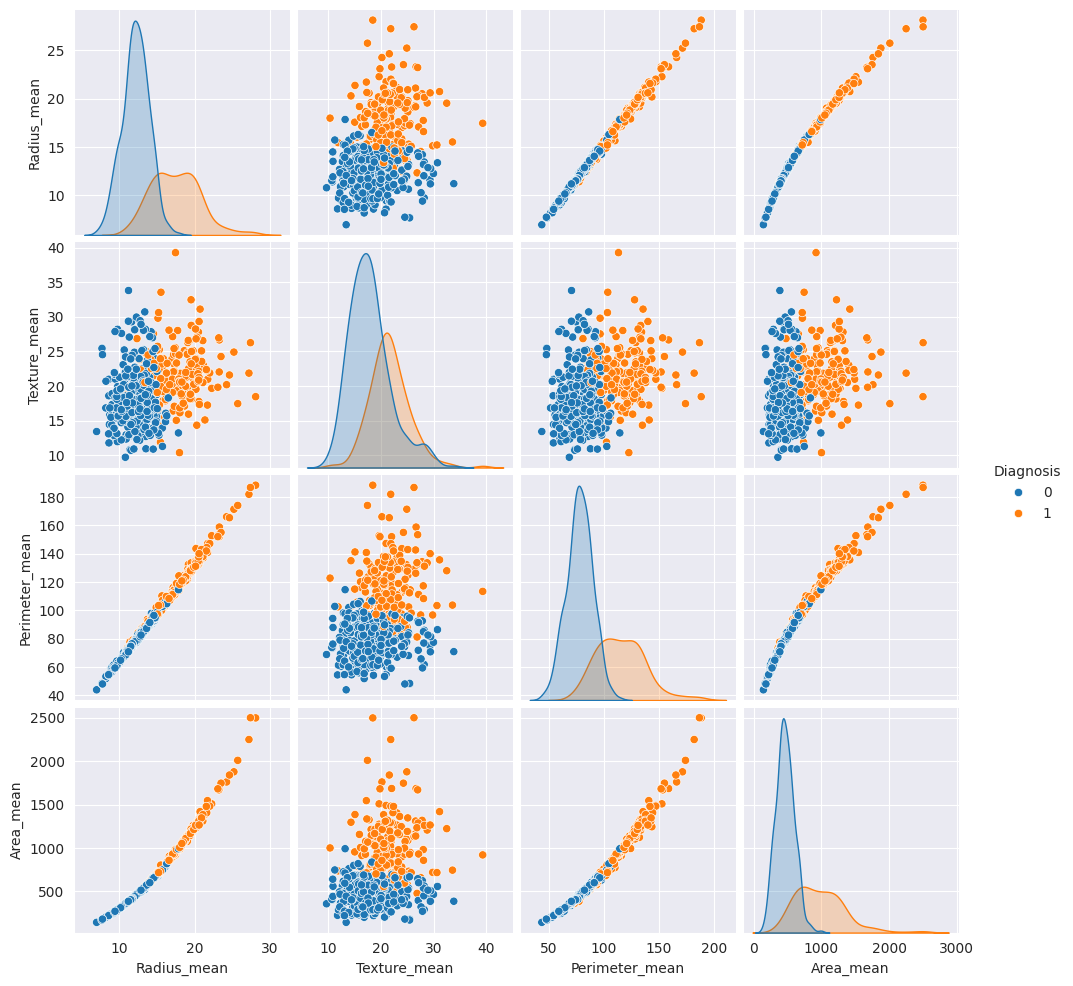

In [11]:
'''
sns.pairplot(data=df, hue='Diagnosis', vars= ['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
       'Concavity_mean', 'Radius_se', 'Perimeter_se', 'Area_se',
       'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
       'Compactness_worst', 'Concavity_worst', 'Concave_points_worst'])
plt.show()
'''


#sns.scatterplot(x='Texture_mean', y='Perimeter_mean', hue= 'Diagnosis', data=df)
#plt.show()


sns.pairplot(df, hue='Diagnosis', vars=['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean'])
plt.show()


### Conclusion
MOst of the features have overlap together and some of them have a linear relation together
SO we will fit SVM and Logistic Regression

### Split dataset into train and test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'x_train shape= {x_train.shape}, y_train= {y_train.shape}')
print(f'x_test shape= {x_test.shape}')


x_train shape= (398, 30), y_train= (398,)
x_test shape= (171, 30)


### Fit  and Evaluate the Model
* based on counts_up output number of 0 label > 1 label ==> jaccard score output is better for label 0

jaccard Index Score for label 0 : 0.944954128440367
Classification Report=
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       108
           1       0.93      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

accuracy_LogR=  0.965
log loss= 1.264689592600602
[[ 62   1]
 [  5 103]]
Confusion matrix, without normalization
[[ 62   1]
 [  5 103]]


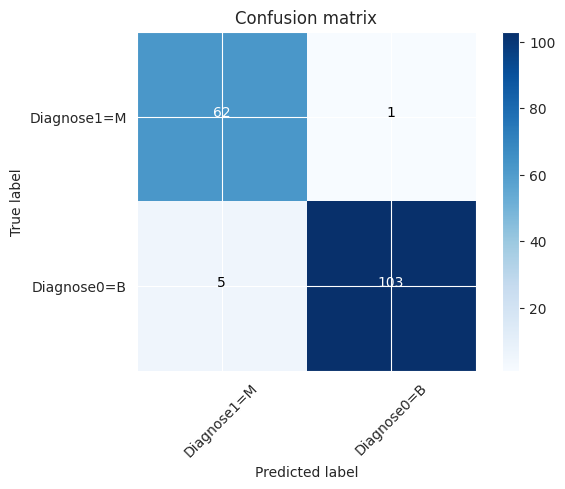

In [30]:
# Fit the model
LOGREG = LogisticRegression(C=1, penalty='l2', solver='liblinear')
LOGREG.fit(x_train,y_train)
yhat_LOG = LOGREG.predict(x_test)
yhat_prob = LOGREG.predict_proba(x_test)[:,1]

# Count the number of occurrence of 0 and 1 in yhat  [num of 0, num of 1]
counts_up = np.bincount(yhat_LOG)

# Calculate Jaccard Score
jaccard = jaccard_score(y_test, yhat_LOG, pos_label=0)
print(f'jaccard Index Score for label 0 : {jaccard}')

# Calculate F1_score, accuracy, precision
print(f'Classification Report=\n {classification_report(y_test, yhat_LOG)}')


# calculate accuracy score of Logistic regression
accuracy_LogR = accuracy_score(y_test,yhat_LOG)
print(f'accuracy_LogR= {accuracy_LogR: .3f}')

#calculate log_loss
print(f'log loss= {log_loss(y_test, yhat_LOG)}')



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_LOG, labels=[1,0]))   

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LOG, labels=[1,0])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diagnose1=M','Diagnose0=B'],normalize= False,  title='Confusion matrix')




### Conclusion
X = all features, model = LogisticRegression(C=1, penalty='l2', solver = 'liblinear'),  test_size = 0.2  => jaccard_score(label=0) = 0.92,  accuracy = 0.96

X = all features, model = LogisticRegression(C=1, penalty='l2', solver = 'liblinear'),  test_size = 0.3  => jaccard_score(label=0) = 0.94,  accuracy = 0.96

X = all features, model = LogisticRegression(C=1, penalty='l2', solver = 'liblinear'), test_size = 0.45 => jaccard_score(label=0) = 0.93, accuracy = 0.96

### Check Overfitting on  all Features 

In [14]:
yhat_train = LOGREG.predict(x_train)

train_jaccard = jaccard_score(y_train, yhat_train, pos_label=0)
train_cnf_matrix = confusion_matrix(y_train,yhat_train)
train_class_rep = classification_report(y_train, yhat_train)
print(f'Jaccard Score for train set= {train_jaccard}')
print(f'Confusion Matrix for train set=\n {train_cnf_matrix}')
print(f' Classification report on train dataset= \n {train_class_rep}')

Jaccard Score for train set= 0.9343629343629344
Confusion Matrix for train set=
 [[242   7]
 [ 10 139]]
 Classification report on train dataset= 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       249
           1       0.95      0.93      0.94       149

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.96      0.96       398



#### jaccard score for train dataset = 0.93, accuracy = 0.96
#### jaccard score for test data set = 0.94, accuracy = 0.96
#### No sign of complete fitting in confusion matrix of train dataset
#### There is no sign of Overfitting

### Improvement:
* change features to features_selected

* Fit Logistic Regression

In [15]:
selected_X = df[['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
       'Concavity_mean', 'Radius_se', 'Perimeter_se', 'Area_se',
       'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
       'Compactness_worst', 'Concavity_worst', 'Concave_points_worst']].values

x1_train, x1_test, y1_train, y1_test = train_test_split(selected_X, y, test_size= 0.2, random_state=1)
print(f'x1_train shape= {x1_train.shape}, y1_train= {y1_train.shape}')
print(f'x1_test shape= {x1_test.shape}')

ed1_LOGREG = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=10000, warm_start=True)
ed1_LOGREG.fit(x1_train, y1_train)
yhat1_LOG = ed1_LOGREG.predict(x1_test)
yhat1_count = np.bincount(yhat1_LOG)
yhat1_count

# calculate the probability of target value
yhat1_prob = ed1_LOGREG.predict_proba(x1_test)[:, 1]

x1_train shape= (455, 15), y1_train= (455,)
x1_test shape= (114, 15)


### Evaluation (X = selected features)

In [29]:
# Calculate jaccard score
ed1_jaccard = jaccard_score(y1_test,yhat1_LOG, pos_label=0)
print(f'ed1_jaccard Index Score for label 0 : {ed1_jaccard}')

#calcualte classification report abd confusion matrix
print(f'ed1 classifiacation Report:\n {classification_report(y1_test,yhat1_LOG)}')
ed1_cnf_matrix = confusion_matrix(y1_test, yhat1_LOG, labels=[1,0])
print(f'ed1_confusion matrix : \n {ed1_cnf_matrix}')

# calculate log_loss
print(f'log_loss= {log_loss(y1_test,yhat1_prob)}')

#Calculate accuracy score of Logistic Regression on selected feature
accuracy_LogR1 = accuracy_score(y1_test,yhat1_LOG)
print(f'accuracy_LogR1= {accuracy_LogR1: .3f}')

ed1_jaccard Index Score for label 0 : 0.96
ed1 classifiacation Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

ed1_confusion matrix : 
 [[39  3]
 [ 0 72]]
log_loss= 0.11765126380777553
accuracy_LogR=  0.965
accuracy_LogR1=  0.974


## Check Overfitting on Selected Features

In [35]:
# Predict yhat on trainset
yhat1_train = ed1_LOGREG.predict(x1_train)

# Calculate Jaccard Score
train_jaccard1 = jaccard_score(y1_train, yhat1_train, pos_label=0)
print(f'Jaccard Score for  selected features train set= {train_jaccard1}')

# Calculate f1_score, recall and precision
train_class1_rep = classification_report(y1_train, yhat1_train)
print(f' Classification report on selected features train dataset= \n {train_class1_rep}')


# Calculate Confusion Matrix
train_cnf1_matrix = confusion_matrix(y1_train,yhat1_train, labels=[1,0])
print(f'Confusion Matrix for selected features train set=\n {train_cnf1_matrix}')

Jaccard Score for  selected features train set= 0.9556313993174061
 Classification report on selected features train dataset= 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       285
           1       0.97      0.95      0.96       170

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

Confusion Matrix for selected features train set=
 [[162   8]
 [  5 280]]


## Conclusion
X = selected features, model = LogisticRegression(C=1, penalty='l2', solver = 'liblinear'),  test_size = 0.2  => jaccard_score(label=0) = 0.92,  accuracy = 0.95

X = selected features, model = LogisticRegression(C=1, penalty='l2', solver = 'liblinear'),  test_size = 0.3  => jaccard_score(label=0) = 0.92,  accuracy = 0.95

X = selected features, model = LogisticRegression(C=1, penalty='l2', solver = 'liblinear'),  test_size = 0.45 => jaccard_score(label=0) = 0.89, accuracy = 0.93

-------------------------------------
## *best score:*
X = selected features,  test_size = 0.2

ed1_LOGREG = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=1000)

ed1_jaccard Index Score for label 0 : 0.96

accuracy                           0.974

ed1_confusion matrix : 
 [[39  3]
 [ 0 72]]



## CHeck Overfitting

In [17]:
yhat1_train = ed1_LOGREG.predict(x1_train)

ed1_train_jaccard = jaccard_score(y1_train, yhat1_train, pos_label=0)
ed1_train_cnf_matrix = confusion_matrix(y1_train,yhat1_train)
ed1_train_class_rep = classification_report(y1_train, yhat1_train)

print(f'Jaccard Score for train set= {ed1_train_jaccard}')
print(f'Confusion Matrix for train set=\n {ed1_train_cnf_matrix}')
print(f' Classification report on train dataset= \n {ed1_train_class_rep}')

Jaccard Score for train set= 0.9556313993174061
Confusion Matrix for train set=
 [[280   5]
 [  8 162]]
 Classification report on train dataset= 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       285
           1       0.97      0.95      0.96       170

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



#### X = selected feature
#### jaccard score for train dataset = 0.95, accuracy = 0.97
#### jaccard score for test data set = 0.96, accuracy = 0.97
#### No sign of complete fitting in confusion matrix of train dataset
#### There is no sign of Overfitting
______________________

### Use Cross Validation to compare LogisticRegression with SVM

In [87]:
kernel_scores = []
Kernels=['linear', 'poly', 'rbf', 'sigmoid']
for k in Kernels:
    clf = svm.SVC(kernel=k)
    clf.fit(x_train, y_train)
    cross_SVM = cross_val_score(clf, x_train, y_train,cv=10,scoring='accuracy')
    kernel_scores.append(cross_SVM.mean())
    
#print(f'Kernels = {Kernels}')
#print(f'Kernel Scores= {kernel_scores}')

for kernel,score in zip(Kernels, kernel_scores) :
    print(f'SVM {kernel} Kernel,  mean scores = {score}')
    
cross_LOGREG = cross_val_score(ed1_LOGREG, x1_train, y1_train,cv=10,scoring='accuracy')
print(f'LogisticRegression mean score= {cross_LOGREG.mean()}')  

SVM linear Kernel,  mean scores = 0.9523717948717948
SVM poly Kernel,  mean scores = 0.902051282051282
SVM rbf Kernel,  mean scores = 0.902051282051282
SVM sigmoid Kernel,  mean scores = 0.4470512820512821
LogisticRegression mean score= 0.956135265700483


### Select SVM model with linear Kernel to fit on dataset
best accuracy in svm.SVC(kernel = 'linear', C=1) :  0.96

In [27]:
clf = svm.SVC(kernel = 'linear', C=1)
clf.fit(x_train,y_train)
yhat_svm = clf.predict(x_test)
clf_repo= classification_report(y_test, yhat_svm)
clf_conf_mx= confusion_matrix(y_test, yhat_svm, labels=[1,0])
accuracy_svm = accuracy_score(y_test, yhat_svm)
print(f'Classification Report of SVM model with Linear Kernel: \n {clf_repo}')
print(f'Confusion Matrix of SVM model with Linear Kernel: \n {clf_conf_mx}')
print(f'accuracy score= {accuracy_svm}')

clf1 = svm.SVC(kernel = 'linear', C=1)
clf1.fit(x1_train,y1_train)
yhat1_svm = clf1.predict(x1_test)
clf1_repo= classification_report(y1_test, yhat1_svm)
clf1_conf_mx= confusion_matrix(y1_test, yhat1_svm, labels=[1,0])
accuracy_svm1 = accuracy_score(y1_test, yhat1_svm)
print(f'Classification Report of SVM model with Linear Kernel on selected features: \n {clf1_repo}')
print(f'Confusion Matrix of SVM model with Linear Kernel on selected features: \n {clf1_conf_mx}')
print(f'accuracy score on feature selected = {accuracy_svm1}')

Classification Report of SVM model with Linear Kernel: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix of SVM model with Linear Kernel: 
 [[ 61   2]
 [  5 103]]
accuracy score= 0.9590643274853801
Classification Report of SVM model with Linear Kernel on selected features: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix of SVM model with Linear Kernel on selected features: 
 [[37  5]
 [ 0 72]]
accuracy 